In [ ]:
# Import Modules

import pandas as pd
import numpy as np
#import mysql.connector as sqlcon

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import plotly.express as px

In [ ]:
from matplotlib import style

In [ ]:
!pip install plotly

In [ ]:
!pip install pandas

In [ ]:
!pip install mysql

In [ ]:
!pip install mysql-connector

In [ ]:
import pymysql
import pandas as pd

In [ ]:
# In the python cmd, install packages:
!pip3 install pymysql
!pip3 install ipython-sql
!pip3 install mysqlclient

# in the jupyter notebook:
import pymysql
import pandas as pd


In [ ]:
import sqlalchemy
import pandas

# **SQL**

In [ ]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Aryomadan123',
    database = 'northwind_db'
)

In [ ]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

context:
northwind is f&b company. we wants to look at the general image of their business status, specifically with their orders(confirm allocation purwadhika student) so in this project we will have a look at northwind database with orders as our focus analysis.

table info:
Northwind database has 13 tables:
    1) Categories : store information about category for each product and description
    2) Customer   : Store Informationof each customers
    3) employess  : store information about of each employees
    4) orders     : Store information of each orders
    5) Ordersdetails : An extention of order tables, store information of each orders
    6) Products   : Store information of each product
    7) Region     : Store information about regions office/stores
    8) Shippers   : Store Information about shippers and their contacts
    9) Suppliers  : Store information about suppliers
    10) Territories : Store infomation about name of the cities which the employees is responsible for
    11) Employeeterritories : connection table employee with terretorries,
    
 and the least 2 table null row
- *Customercustomerdemo: Empty table.
- *Customerdemographics: Empty table.

# Query SQL (gathering information from sql)

Union : menggabungkan data yang serupa 

In [ ]:
union = sql_table (
    '''
 select City, CompanyName, ContactName, 'Customers' as Relationship 
from Customers
union
select City, CompanyName, ContactName, 'Suppliers'
from Suppliers
order by City, CompanyName;

    '''
)
union.head()

,City,CompanyName,ContactName,Relationship
0,None,IT,Val2,Customers
1,None,IT,Valon Hoti,Customers
2,Aachen,Drachenblut Delikatessen,Sven Ottlieb,Customers
3,Albuquerque,Rattlesnake Canyon Grocery,Paula Wilson,Customers
4,Anchorage,Old World Delicatessen,Rene Phillips,Customers


In [ ]:
orders = sql_table (
    '''
 select * from orders;

    '''
)
orders.shape

(830, 14)

# **QUERY1 : Merger Data SQL 4 table orders terbanyak dari customer dan product apa**

for this analsis, we will only 4 tables related to orders, whicj is 

# Data Understanding

In [ ]:
df = sql_table (
    '''
 select e.EmployeeID, concat(e.FirstName,' ',e.LastName)  as EmployeeName, e.Country As Loc_Country_Employee,
    o.OrderID, o.OrderDate, o.RequiredDate, o.ShippedDate, s.ShipperID, s.CompanyName, o.ShipName,
    c.CustomerID, c.CompanyName, c.Country as Customer_Country,
    od.UnitPrice as Sell_Price, 
    p.UnitPrice as BasePrice,
    od.Quantity as Quantity, (od.UnitPrice * od.Quantity) as GrossIncome,
    (p.UnitPrice * od.Quantity) as BaseIncome
    from Employees e
    inner join Orders o on e.EmployeeID = o.EmployeeID
    inner join customers c on o.CustomerID = o.CustomerID
    inner join orderdetails od on o.OrderID = od.OrderID
    inner join products p on od.ProductID = p.ProductID
    inner join shippers s on o.ShipVia = s.ShipperID;

    '''
)
df.head()

,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipperID,CompanyName,ShipName,CustomerID,CompanyName,Customer_Country,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome
0,3,Janet Leverling,USA,11063,1998-04-30,1998-05-28,1998-05-06,2,United Package,Hungry Owl All-Night Grocers,ALFKI,Alfreds Futterkiste,Germany,18.4000,18.4000,40,736.0000,736.0000
1,3,Janet Leverling,USA,11063,1998-04-30,1998-05-28,1998-05-06,2,United Package,Hungry Owl All-Night Grocers,ALFKI,Alfreds Futterkiste,Germany,14.0000,14.0000,30,420.0000,420.0000
2,4,Margaret Peacock,USA,11062,1998-04-30,1998-05-28,NaT,2,United Package,Reggiani Caseifici,ALFKI,Alfreds Futterkiste,Germany,15.0000,15.0000,12,180.0000,180.0000
3,4,Margaret Peacock,USA,11062,1998-04-30,1998-05-28,NaT,2,United Package,Reggiani Caseifici,ALFKI,Alfreds Futterkiste,Germany,32.8000,32.8000,10,328.0000,328.0000
4,4,Margaret Peacock,USA,11061,1998-04-30,1998-06-11,NaT,3,Federal Shipping,Great Lakes Food Market,ALFKI,Alfreds Futterkiste,Germany,34.0000,34.0000,15,510.0000,510.0000


In [ ]:
df.shape

(200415, 18)

# QUERY2 : Berapa jenis product yang tersedia di setiap jenis prosuk dan total qty dan harga beli setiap produknya (Aggregating function)**

In [ ]:
#Berapa banyak jenis produk yang tersedia?
#Berapa banyak jumlah produk untuk setiap jenis produknya?
#Serta berapa total quantity dan total harga beli untuk setiap jenis produknya?


tabel1 = sql_table (
    '''
select c.categoryid, c.categoryname, SUM(p.unitsinstock) as total_quantity, sum(p.unitprice) as total_price
from products p 
inner join categories c on p.categoryid = c.categoryid
group by c.categoryname;

    '''
)
tabel1.head()

,categoryid,categoryname,total_quantity,total_price
0,1,Beverages,559,455.7500
1,2,Condiments,507,276.7500
2,3,Confections,386,327.0800
3,4,Dairy Products,393,287.3000
4,5,Grains/Cereals,308,141.7500


In [ ]:
#employee mana saja yang berhasil mendapatkan banyak rder

employee_order = sql_table( 
    '''
    select a.EmployeeID, count(b.OrderID) as jumblah
from employees a inner join orders b
on a.EmployeeID = b.EmployeeID
group by a.EmployeeID;
'''
)
employee_order

,EmployeeID,jumblah
0,1,123
1,2,96
2,3,127
3,4,156
4,5,42
5,6,67
6,7,72
7,8,104
8,9,43


# Data Analysis

### **Orders Related Data**

For this analysis, we will only use 4 tables related to suppliers, which is ```Orders```, ```Customer```, ```CategEmployeesories```, ```OrderDetails```, and ```Shippers```
Not all of the columns will be used here, we'll only select a few that might be useful in our ```Orders``` analysis:
- OrderID from Orders
- RequiredDate from Orders
- ShippedDate from Orders
- ShipName from Orders
- ShipCoutry from Orders
- CompanyName from Shippers
- Country from Suppliers
- ProductName from Products
- CategoryName from Categories
- UnitPrice from Orderdetails
- UnitPrice from Products
- Quantity from Orderdetails
- ```GrossIncome``` which is the multiplication of ```UnitPrice``` from Orderdetails and ```Quantity```
- ```BaseIncome``` which is the multiplication of ```UnitPrice``` from Products and ```Quantity```
- ```Discrepancy``` which is the subtraction of ```GrossIncome``` and ```BasePrice```
- ```PercentDiscrepancy``` which is the subtraction of ```GrossIncome``` and ```BasePrice``` in percentage

In [ ]:
df = sql_table (
    '''
    select e.EmployeeID, concat(e.FirstName,' ',e.LastName)  as EmployeeName, e.Country As Loc_Country_Employee,
    o.OrderID, o.OrderDate, o.RequiredDate, o.ShippedDate, o.ShipName, o.ShipCountry as ShipCountry,
    c.CustomerID, c.CompanyName as Customer_Company_Name, c.Country as Customer_Country,
    s.ShipperID, s.CompanyName as Loc_ShipperCompany, 
    od.UnitPrice as Sell_Price, 
    p.UnitPrice as BasePrice,
    od.Quantity as Quantity, (od.UnitPrice * od.Quantity) as GrossIncome,
    (p.UnitPrice * od.Quantity) as BaseIncome
    from Employees e
    inner join Orders o on e.EmployeeID = o.EmployeeID
    inner join customers c on o.CustomerID = o.CustomerID
    inner join orderdetails od on o.OrderID = od.OrderID
    inner join products p on od.ProductID = p.ProductID
    inner join shippers s on o.ShipVia = s.ShipperID;

    '''
)
df.head(1)

,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,CustomerID,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome
0,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,ALFKI,Alfreds Futterkiste,Germany,2,United Package,13.0000,13.0000,18,234.0000,234.0000


In [ ]:
df.shape

(200415, 19)

In [ ]:
df.shape

(200415, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189462 entries, 0 to 189461
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             189462 non-null  int64         
 1   EmployeeID             189462 non-null  int64         
 2   EmployeeName           189462 non-null  object        
 3   Loc_Country_Employee   189462 non-null  object        
 4   OrderID                189462 non-null  int64         
 5   OrderDate              189462 non-null  object        
 6   RequiredDate           189462 non-null  datetime64[ns]
 7   ShippedDate            189462 non-null  datetime64[ns]
 8   ShipName               189462 non-null  object        
 9   ShipCountry            189462 non-null  object        
 10  CustomerID             189462 non-null  object        
 11  Customer_Company_Name  189462 non-null  object        
 12  Customer_Country       189462 non-null  obje

In [ ]:
#df['RequiredDate'] = pd.to_datetime(df['RequiredDate'])

In [ ]:
#df['ShippedDate'] = pd.to_datetime(df['ShippedDate'])

In [ ]:
#df.to_csv('C:/dfbaru.csv')

Karena kita fokus ke menganalisa table orders yang berjumblah 830 rows

In [ ]:
df.shape

(200415, 19)

# ** Data Preparation**

Before we analysis the dataset, 
it is important to check :

1) the data of missing values
2) duplicate
3) anomalies
4) incorrect data types so that our analysis won't be biased or inaccurate.

In [ ]:
# Check for missing values
df.isna().sum()

EmployeeID                  0
EmployeeName                0
Loc_Country_Employee        0
OrderID                     0
OrderDate                   0
RequiredDate                0
ShippedDate              6789
ShipName                    0
ShipCountry                 0
CustomerID                  0
Customer_Company_Name       0
Customer_Country         4310
ShipperID                   0
Loc_ShipperCompany          0
Sell_Price                  0
BasePrice                   0
Quantity                    0
GrossIncome                 0
BaseIncome                  0
dtype: int64

In [ ]:
Isnull = df.isnull().sum()/len(df)*100
Isnull

EmployeeID                 0.000000
EmployeeName               0.000000
Loc_Country_Employee       0.000000
OrderID                    0.000000
OrderDate                  0.000000
RequiredDate               0.000000
ShippedDate              817.951807
ShipName                   0.000000
ShipCountry                0.000000
CustomerID                 0.000000
Customer_Company_Name      0.000000
Customer_Country         519.277108
ShipperID                  0.000000
Loc_ShipperCompany         0.000000
Sell_Price                 0.000000
BasePrice                  0.000000
Quantity                   0.000000
GrossIncome                0.000000
BaseIncome                 0.000000
dtype: float64

### a) ShippedDate              

In [ ]:
# Check for duplicates
df.duplicated().sum()

93

In [ ]:
df[df['ShippedDate'].isna()].shape

(6789, 19)

Focus Analysis Null Value on Shipped Date

In [ ]:
df[df['ShippedDate'].isna()]

,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,CustomerID,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome
17,7,Robert King,UK,11008,1998-04-08,1998-05-06,NaT,Ernst Handel,Austria,ALFKI,Alfreds Futterkiste,Germany,3,Federal Shipping,21.5000,21.5000,21,451.5000,451.5000
18,7,Robert King,UK,11008,1998-04-08,1998-05-06,NaT,Ernst Handel,Austria,ALFKI,Alfreds Futterkiste,Germany,3,Federal Shipping,14.0000,14.0000,90,1260.0000,1260.0000
19,7,Robert King,UK,11008,1998-04-08,1998-05-06,NaT,Ernst Handel,Austria,ALFKI,Alfreds Futterkiste,Germany,3,Federal Shipping,45.6000,45.6000,70,3192.0000,3192.0000
2000,7,Robert King,UK,11008,1998-04-08,1998-05-06,NaT,Ernst Handel,Austria,ANATR,Ana Trujillo Emparedados y helados,Mexico,3,Federal Shipping,21.5000,21.5000,21,451.5000,451.5000
2001,7,Robert King,UK,11008,1998-04-08,1998-05-06,NaT,Ernst Handel,Austria,ANATR,Ana Trujillo Emparedados y helados,Mexico,3,Federal Shipping,14.0000,14.0000,90,1260.0000,1260.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200351,1,Nancy Davolio,USA,11039,1998-04-21,1998-05-19,NaT,LINO-Delicateses,Venezuela,WOLZA,Wolski Zajazd,Poland,2,United Package,20.0000,20.0000,60,1200.0000,1200.0000
200352,1,Nancy Davolio,USA,11039,1998-04-21,1998-05-19,NaT,LINO-Delicateses,Venezuela,WOLZA,Wolski Zajazd,Poland,2,United Package,18.0000,18.0000,24,432.0000,432.0000
200353,1,Nancy Davolio,USA,11039,1998-04-21,1998-05-19,NaT,LINO-Delicateses,Venezuela,WOLZA,Wolski Zajazd,Poland,2,United Package,45.6000,45.6000,20,912.0000,912.0000
200405,6,Michael Suyama,UK,11019,1998-04-13,1998-05-11,NaT,Rancho grande,Argentina,WOLZA,Wolski Zajazd,Poland,3,Federal Shipping,20.0000,20.0000,2,40.0000,40.0000


Why ShippedDate input NaT value ? confirm this is wrong input from admin so we can drop this rows

In [ ]:
df = df.drop(df.index[df['ShippedDate'].isna()], inplace=True)

In [ ]:
df.shape

(193626, 19)

In [ ]:
df.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Check Missing Value Percentage

df.isnull().sum()

EmployeeID                  0
EmployeeName                0
Loc_Country_Employee        0
OrderID                     0
OrderDate                   0
RequiredDate                0
ShippedDate                 0
ShipName                    0
ShipCountry                 0
CustomerID                  0
Customer_Company_Name       0
Customer_Country         4164
ShipperID                   0
Loc_ShipperCompany          0
Sell_Price                  0
BasePrice                   0
Quantity                    0
GrossIncome                 0
BaseIncome                  0
dtype: int64

In [ ]:
percentage missing value

In [ ]:
Isnull = df.isnull().sum()/len(orders)
Isnull

EmployeeID               0.000000
EmployeeName             0.000000
Loc_Country_Employee     0.000000
OrderID                  0.000000
OrderDate                0.000000
RequiredDate             0.000000
ShippedDate              0.000000
ShipName                 0.000000
ShipCountry              0.000000
CustomerID               0.000000
Customer_Company_Name    0.000000
Customer_Country         5.016867
ShipperID                0.000000
Loc_ShipperCompany       0.000000
Sell_Price               0.000000
BasePrice                0.000000
Quantity                 0.000000
GrossIncome              0.000000
BaseIncome               0.000000
dtype: float64

## b) Customer_Country         

In [ ]:
df[df['Customer_Country'].isna()].shape

(4164, 19)

In [ ]:
 df[df['Customer_Country'].isna()]

,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,CustomerID,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome
164589,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,Val2,IT,None,2,United Package,13.0000,13.0000,18,234.0000,234.0000
164590,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,Val2,IT,None,2,United Package,25.8900,25.8900,15,388.3500,388.3500
164591,2,Andrew Fuller,USA,11014,1998-04-10,1998-05-08,1998-04-15,LINO-Delicateses,Venezuela,Val2,IT,None,3,Federal Shipping,9.6500,9.6500,28,270.2000,270.2000
164592,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,Val2,IT,None,1,Speedy Express,12.5000,12.5000,2,25.0000,25.0000
164593,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,Val2,IT,None,1,Speedy Express,9.5000,9.5000,20,190.0000,190.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199034,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,VALON,IT,None,2,United Package,15.0000,15.0000,30,450.0000,450.0000
199035,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,VALON,IT,None,2,United Package,55.0000,55.0000,110,6050.0000,6050.0000
199036,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,VALON,IT,None,2,United Package,10.0000,10.0000,25,250.0000,250.0000
199037,9,Anne Dodsworth,UK,11016,1998-04-10,1998-05-08,1998-04-13,Around the Horn,UK,VALON,IT,None,2,United Package,19.0000,19.0000,16,304.0000,304.0000


In [ ]:
df[df['CustomerID']=='VALON']

,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,CustomerID,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome
166572,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,VALON,IT,None,2,United Package,13.0000,13.0000,18,234.0000,234.0000
166573,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,VALON,IT,None,2,United Package,25.8900,25.8900,15,388.3500,388.3500
166574,2,Andrew Fuller,USA,11014,1998-04-10,1998-05-08,1998-04-15,LINO-Delicateses,Venezuela,VALON,IT,None,3,Federal Shipping,9.6500,9.6500,28,270.2000,270.2000
166575,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,VALON,IT,None,1,Speedy Express,12.5000,12.5000,2,25.0000,25.0000
166576,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,VALON,IT,None,1,Speedy Express,9.5000,9.5000,20,190.0000,190.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199034,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,VALON,IT,None,2,United Package,15.0000,15.0000,30,450.0000,450.0000
199035,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,VALON,IT,None,2,United Package,55.0000,55.0000,110,6050.0000,6050.0000
199036,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,VALON,IT,None,2,United Package,10.0000,10.0000,25,250.0000,250.0000
199037,9,Anne Dodsworth,UK,11016,1998-04-10,1998-05-08,1998-04-13,Around the Horn,UK,VALON,IT,None,2,United Package,19.0000,19.0000,16,304.0000,304.0000


In [ ]:
isnaCustomerCountry = df[df['Customer_Country'].isna()]

In [ ]:
isnaCustomerCountry['ShipperID'].head(2)

164589    2
164590    2
Name: ShipperID, dtype: int64

In [ ]:
df['Customer_Country'].nunique()

21

In [ ]:
df.groupby("Customer_Country").nunique().sort_values("CustomerID", ascending=False)[["CustomerID"]]

,CustomerID
Customer_Country,
USA,13
Germany,11
France,11
Brazil,9
UK,7
Spain,5
Mexico,5
Venezuela,4
Argentina,3


Average data null value on customer country no way to put other list. so we can drop this rows

In [ ]:
df = df.drop(df.index[df['Customer_Country'].isna()])

In [ ]:
df.isna().sum()

Unnamed: 0               0
EmployeeID               0
EmployeeName             0
Loc_Country_Employee     0
OrderID                  0
OrderDate                0
RequiredDate             0
ShippedDate              0
ShipName                 0
ShipCountry              0
CustomerID               0
Customer_Company_Name    0
Customer_Country         0
ShipperID                0
Loc_ShipperCompany       0
Sell_Price               0
BasePrice                0
Quantity                 0
GrossIncome              0
BaseIncome               0
dtype: int64

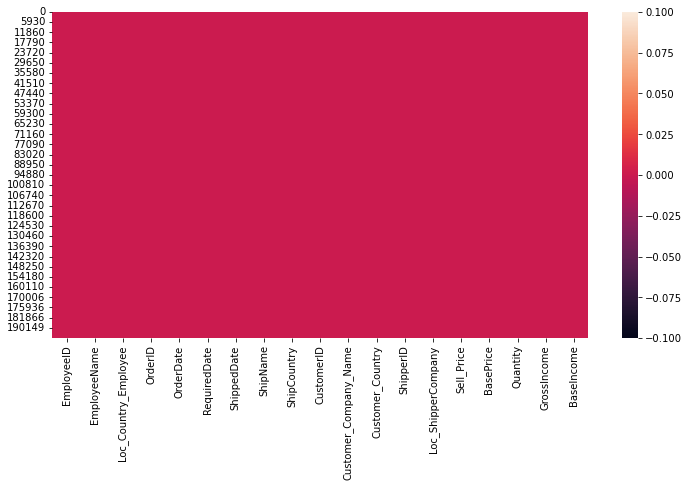

In [ ]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

### Check masing-masing unique value on dataset

In [ ]:
#deskripsi unique
numerical_col = []
cat_col = []
for x in df.columns:
    if df[x].dtype == 'object':
        cat_col.append(x)
        print(x+': ' + str(len(df[x].unique())))
    else:
        numerical_col.append(x)
        
print('CAT col \n', cat_col)
print('Numerical col\n')
print(numerical_col)

EmployeeName: 9
Loc_Country_Employee: 2
ShipName: 90
ShipCountry: 21
CustomerID: 91
Customer_Company_Name: 91
Customer_Country: 21
Loc_ShipperCompany: 3
Sell_Price: 116
BasePrice: 62
GrossIncome: 832
BaseIncome: 709
CAT col 
 ['EmployeeName', 'Loc_Country_Employee', 'ShipName', 'ShipCountry', 'CustomerID', 'Customer_Company_Name', 'Customer_Country', 'Loc_ShipperCompany', 'Sell_Price', 'BasePrice', 'GrossIncome', 'BaseIncome']
Numerical col

['EmployeeID', 'OrderID', 'OrderDate', 'RequiredDate', 'ShippedDate', 'ShipperID', 'Quantity']


### Creating New Table for get information how long order customer when in delivery ( Create New Column)

In [ ]:
# Add New Column (Processing Day)

df['ProcessingDate'] = df['RequiredDate'] - df['ShippedDate']
df.sample(2)

,Unnamed: 0,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,...,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome,ProcessingDate
13871,13892,3,Janet Leverling,USA,11011,1998-04-09,1998-05-07,1998-04-13,Alfred-s Futterkiste,Germany,...,Blido Comidas preparadas,Spain,1,Speedy Express,13.25,13.25,40,530.0,530.0,24 days
47937,48012,8,Laura Callahan,USA,10845,1998-01-21,1998-02-04,1998-01-30,QUICK-Stop,Germany,...,Frankenversand,Germany,1,Speedy Express,18.00,18.00,25,450.0,450.0,5 days


In [ ]:
df[df['ProcessingDate'] < '0 days'].shape

(8372, 21)

In [ ]:
df[df['ProcessingDate'] > '0 days'].shape

(180180, 21)

In [ ]:
8372/184140

0.04546540675572933

jadi bisa disimpulkan bahwa banyak yang telat sampai ke customer barangnya 4.5 % dari total barang order yang dikirim.

In [ ]:
#orders.drop(['ProcessShipingDate'],axis=1, inplace=True)

In [ ]:
#deskripsi unique
numerical_col = []
cat_col = []
for x in df.columns:
    if df[x].dtype == 'object':
        cat_col.append(x)
        print(x+': ' + str(len(df[x].unique())))
    else:
        numerical_col.append(x)
        
print('CAT col \n', cat_col)
print('Numerical col\n')
print(numerical_col)

EmployeeName: 9
Loc_Country_Employee: 2
ShipName: 90
ShipCountry: 21
CustomerID: 91
Customer_Company_Name: 91
Customer_Country: 21
Loc_ShipperCompany: 3
Sell_Price: 116
BasePrice: 62
GrossIncome: 832
BaseIncome: 709
CAT col 
 ['EmployeeName', 'Loc_Country_Employee', 'ShipName', 'ShipCountry', 'CustomerID', 'Customer_Company_Name', 'Customer_Country', 'Loc_ShipperCompany', 'Sell_Price', 'BasePrice', 'GrossIncome', 'BaseIncome']
Numerical col

['EmployeeID', 'OrderID', 'OrderDate', 'RequiredDate', 'ShippedDate', 'ShipperID', 'Quantity', 'ProcessingDate']


In [ ]:
# Check Data Anomalies in Date Time Fomrat

df['ProcessingDate'].value_counts()

21 days     20657
22 days     17381
23 days     15015
25 days     14560
19 days     14469
24 days     14378
26 days     13195
20 days     12649
18 days      8918
16 days      3549
10 days      3367
7 days       3367
27 days      3185
17 days      3094
36 days      2821
5 days       2821
8 days       2730
4 days       2457
9 days       2184
35 days      2093
34 days      2093
11 days      2002
6 days       1911
-1 days      1820
13 days      1638
-7 days      1456
39 days      1456
32 days      1365
15 days      1365
-6 days      1365
3 days       1001
0 days        910
14 days       728
-4 days       728
33 days       546
30 days       546
-5 days       546
1 days        546
-2 days       546
12 days       455
-16 days      455
2 days        455
37 days       455
-18 days      364
-9 days       364
38 days       273
41 days       273
-8 days       182
-3 days       182
28 days       182
-11 days      182
-23 days       91
-17 days       91
Name: ProcessingDate, dtype: int64

In [ ]:
# Handling Date Time Format Anomalies (Check Data First)

df[df['ProcessingDate'] < '0 days'].sample(2)

,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,CustomerID,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome,ProcessingDate
57725,4,Margaret Peacock,USA,10927,1998-03-05,1998-04-02,1998-04-08,La corne d-abondance,France,GODOS,Godos Cocina Tpica,Spain,1,Speedy Express,18.0000,18.0000,20,360.0000,360.0000,-6 days
169445,2,Andrew Fuller,USA,10663,1997-09-10,1997-09-24,1997-10-03,Bon app-,France,VICTE,Victuailles en stock,France,2,United Package,53.0000,53.0000,20,1060.0000,1060.0000,-9 days


In [ ]:
df[df['ProcessingDate'] < '0 days'].sample(2)

,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,CustomerID,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome,ProcessingDate
101085,6,Michael Suyama,UK,10264,1996-07-24,1996-08-21,1996-08-23,Folk och f HB,Sweden,MEREP,Mre Paillarde,Canada,3,Federal Shipping,15.2000,19.0000,35,532.0000,665.0000,-2 days
153190,4,Margaret Peacock,USA,10816,1998-01-06,1998-02-03,1998-02-04,Great Lakes Food Market,USA,THECR,The Cracker Box,USA,2,United Package,263.5000,263.5000,30,7905.0000,7905.0000,-1 days


In [ ]:
df[df['ProcessingDate'] < '0 days'].shape

(8372, 20)

requiredDate - Shoppedate

jadi bisa disimpulkan bahwa banyak yang telat sampai ke customer barangnya at least ini 

# Outliers & Data 

Outliers might indicate skewness in data but having outliers does not equal to anomalies. 

In [ ]:
df.head(2)

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
# Check for duplicates
df.duplicated().sum()

AttributeError: 'NoneType' object has no attribute 'duplicated'

In [ ]:
df = df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df.shape

(189462, 20)

In [ ]:
df

In [ ]:
result_df.shape

In [ ]:
df.info()

In [ ]:
df.groupby("Country").nunique().sort_values("Supplier", ascending=False)[["Supplier"]]

In [ ]:
# Check for anomalies in Price and Quantity
fig = px.box(df, x= ["Quantity", "SellPrice", "BasePrice"])
fig.show()

#Data dari csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/Purwadhika/project_module2/dfbaru.csv'
df = pd.read_csv(path)

In [ ]:
df.shape

(189462, 20)

# Data Analyss & Visualization

Saving dataframe in excel format for tableau visualization
- df.to_excel("Northwind.xlsx", index=None)

We're using Tableau to utilize Tableau's dashboard to offer an interactive and customizable group of plots.

https://public.tableau.com/views/DashboardNorthwindOrders/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [ ]:
df

,Unnamed: 0,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,CustomerID,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome
0,0,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,ALFKI,Alfreds Futterkiste,Germany,2,United Package,13.00,13.00,18,234.00,234.00
1,1,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,ALFKI,Alfreds Futterkiste,Germany,2,United Package,25.89,25.89,15,388.35,388.35
2,2,2,Andrew Fuller,USA,11014,1998-04-10,1998-05-08,1998-04-15,LINO-Delicateses,Venezuela,ALFKI,Alfreds Futterkiste,Germany,3,Federal Shipping,9.65,9.65,28,270.20,270.20
3,3,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,ALFKI,Alfreds Futterkiste,Germany,1,Speedy Express,12.50,12.50,2,25.00,25.00
4,4,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,ALFKI,Alfreds Futterkiste,Germany,1,Speedy Express,9.50,9.50,20,190.00,190.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189457,200410,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,WOLZA,Wolski Zajazd,Poland,2,United Package,15.00,15.00,30,450.00,450.00
189458,200411,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,WOLZA,Wolski Zajazd,Poland,2,United Package,55.00,55.00,110,6050.00,6050.00
189459,200412,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,WOLZA,Wolski Zajazd,Poland,2,United Package,10.00,10.00,25,250.00,250.00
189460,200413,9,Anne Dodsworth,UK,11016,1998-04-10,1998-05-08,1998-04-13,Around the Horn,UK,WOLZA,Wolski Zajazd,Poland,2,United Package,19.00,19.00,16,304.00,304.00


## Top 5 customer order

In [ ]:
# Top 5 Customer based on number of order
dforder = df.groupby("CustomerID").count().sort_values("OrderID", ascending=False)[["OrderID"]].reset_index()
dforder.head()

,CustomerID,OrderID
0,ALFKI,2082
1,ROMEY,2082
2,RICAR,2082
3,REGGC,2082
4,RATTC,2082


In [ ]:
dforder.tail()

,CustomerID,OrderID
86,GALED,2082
87,FURIB,2082
88,FRANS,2082
89,FRANR,2082
90,WOLZA,2082


## Top 5 Employee can highest closing order

In [ ]:
# Top 5 suppliers based on gross income from sales
dfincome = df.groupby(["EmployeeName"]).sum().sort_values("GrossIncome", ascending=False)[["Quantity", "GrossIncome"]].reset_index()
dfincome.head()

,EmployeeName,Quantity,GrossIncome
0,Margaret Peacock,863681.0,22085194.95
1,Janet Leverling,714532.0,19387668.30
2,Nancy Davolio,690053.0,17942389.01
3,Andrew Fuller,531258.0,15810136.16
4,Robert King,404859.0,12385390.29


## Top 5 Customer based on Number of Order

In [ ]:
# Top 5 suppliers based on number of order
dforder = df.groupby("EmployeeName").count().sort_values("OrderID", ascending=False)[["OrderID"]].reset_index()
dforder.head()

,EmployeeName,OrderID
0,Margaret Peacock,37219
1,Janet Leverling,29211
2,Nancy Davolio,28574
3,Laura Callahan,22750
4,Andrew Fuller,21112


In [ ]:
df

,Unnamed: 0,EmployeeID,EmployeeName,Loc_Country_Employee,OrderID,OrderDate,RequiredDate,ShippedDate,ShipName,ShipCountry,...,Customer_Company_Name,Customer_Country,ShipperID,Loc_ShipperCompany,Sell_Price,BasePrice,Quantity,GrossIncome,BaseIncome,ProcessingDate
0,0,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,...,Alfreds Futterkiste,Germany,2,United Package,13.00,13.00,18,234.00,234.00,4 days
1,1,2,Andrew Fuller,USA,11015,1998-04-10,1998-04-24,1998-04-20,Sant Gourmet,Norway,...,Alfreds Futterkiste,Germany,2,United Package,25.89,25.89,15,388.35,388.35,4 days
2,2,2,Andrew Fuller,USA,11014,1998-04-10,1998-05-08,1998-04-15,LINO-Delicateses,Venezuela,...,Alfreds Futterkiste,Germany,3,Federal Shipping,9.65,9.65,28,270.20,270.20,23 days
3,3,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,...,Alfreds Futterkiste,Germany,1,Speedy Express,12.50,12.50,2,25.00,25.00,27 days
4,4,2,Andrew Fuller,USA,11013,1998-04-09,1998-05-07,1998-04-10,Romero y tomillo,Spain,...,Alfreds Futterkiste,Germany,1,Speedy Express,9.50,9.50,20,190.00,190.00,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189457,200410,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,...,Wolski Zajazd,Poland,2,United Package,15.00,15.00,30,450.00,450.00,21 days
189458,200411,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,...,Wolski Zajazd,Poland,2,United Package,55.00,55.00,110,6050.00,6050.00,21 days
189459,200412,9,Anne Dodsworth,UK,11017,1998-04-13,1998-05-11,1998-04-20,Ernst Handel,Austria,...,Wolski Zajazd,Poland,2,United Package,10.00,10.00,25,250.00,250.00,21 days
189460,200413,9,Anne Dodsworth,UK,11016,1998-04-10,1998-05-08,1998-04-13,Around the Horn,UK,...,Wolski Zajazd,Poland,2,United Package,19.00,19.00,16,304.00,304.00,25 days


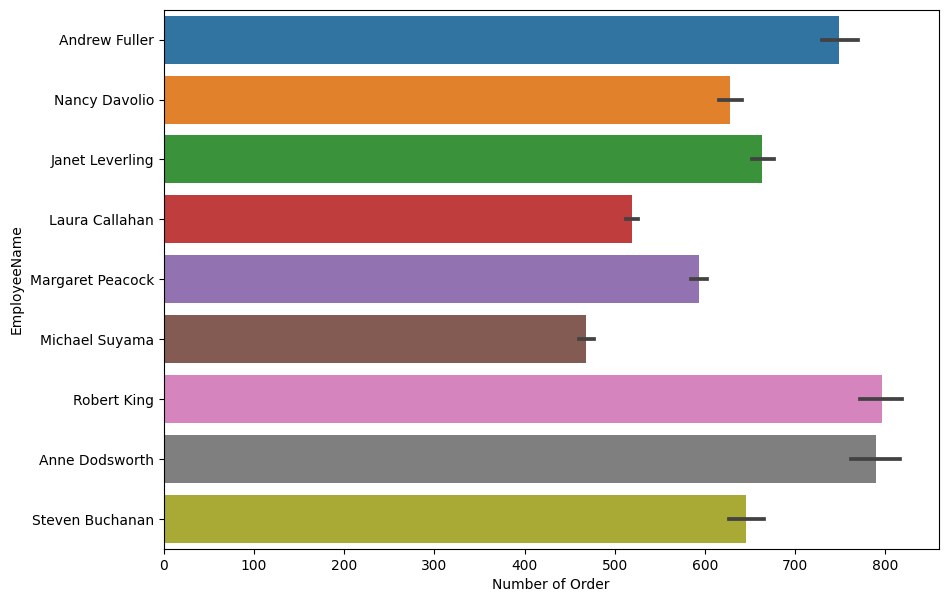

In [ ]:
style.use("default")
plt.figure(figsize=(10,7))
sns.barplot(x= df["GrossIncome"], y= df["EmployeeName"])
plt.xlabel("Number of Order")
plt.show()

##Statistic

In [ ]:
# Normal test for gross income using D'Agostino-Pearson's Method
from scipy.stats import normaltest

norm, pval = normaltest(df["GrossIncome"])

if pval < 0.05 :
    print (f"Reject H0 Because ({pval} < 5%)")
    print ("DATA IS NOT NORMALLY DISTRIBUTED")
else :
    print (f"Fail to Reject H0 Because ({pval} > 5%)")
    print ("DATA IS NORMALLY DISTRIBUTED")

Reject H0 Because (0.0 < 5%)
DATA IS NOT NORMALLY DISTRIBUTED


In [ ]:
# Comparison Test for GrossIncome Value for each employee Using Kruskal-Wallis Method
from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    df[df["EmployeeName"] == "Margaret Peacock"]["GrossIncome"],
    df[df["EmployeeName"] == "Janet Leverling"]["GrossIncome"],
    df[df["EmployeeName"] == "Nancy Davolio"]["GrossIncome"],
    df[df["EmployeeName"] == "Laura Callahan"]["GrossIncome"],
    df[df["EmployeeName"] == "Andrew Fuller"]["GrossIncome"],
  
) 

if pvalkrus < 0.05 :
    print (f"Reject H0 Because P-Value ({pval} < 5%)")
    print ("Difference found in median values for Gross Income for each employee")
else :
    print (f"Fail to Reject H0 Because P-Value ({pval} > 5%)")
    print ("No difference found in median values for Gross Income for each employee")

Reject H0 Because P-Value (0.0 < 5%)
Difference found in median values for Gross Income for each employee


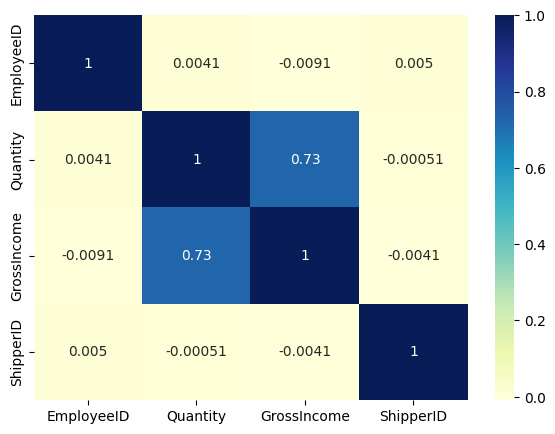

In [ ]:
# Correlation with Spearman Method
style.use("default")
dfcorr = df[["EmployeeID", "Quantity", "GrossIncome",'ShipperID']].corr("spearman")
plt.figure(figsize=(7,5))
sns.heatmap(dfcorr, cmap="YlGnBu", annot=True)
plt.show()

## Kesimpulan 
 

# bahwa employee Margaret dapat menjual sesuai target karena dapat menjual peak tertinggi dan membantu nortwind berjualan (dihitung dari berapa banyak order yang berhasil di dapatkan)
# lalu untuk robert king dapat menjual dengan gross income terbanyak untuk perusahaan  (di hitung dari order detal dan qty yang dijual)